### Purpose: read and plot MOCz data from IMHOTEP and OCCIPUT
NOTE on the 2021-09-16: need to fix method: detrend occiput data before computing the sigma.

In [1]:
## standart libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


### read IMHOTEP MOCz

In [2]:
prefix = "eORCA025.L75-IMHOTEP"
nexp = "EGAI"
nexpREF = "ES"
varna = 'zomsfatl'
fo='1m'

# years to read data from:
y1='1980'
y2='2018'

#  input directory 
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
diridat="/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/"+nexp+"/"
diridref="/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/"+nexpREF+"/"


# output plots
diro="/gpfswork/rech/cli/regi915/PLT/dec2022/mocz/"

# read grid files
tmask = xr.open_dataset(diri+'mesh_hgr.nc')['tmask'][0,0,:,:]
#nav_lon = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lon']
#nav_lat = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lat']

In [4]:
def FloadmultimbMOC(N,diridat,nexp,prefix,varnasss,fo,y1,y2,verbose=True):  
    """ Load data from N ensemble members
            
        Parameters:
        - N (int): Number of members
        - files (str): list of files
        - nexp (str): name of ensemble experiments
        - prefix (str): prexix of experiment
        - varnasss(str): name of variable to read in file
        - fo (str): frequency '1m', '1y'
        
        Returns:
        xarrays: alldat concatenating the data  for all the members (e axis)
        """
    # loop on members
    for ie in range(1,N+1):
        # load 1 member
        if verbose:
            print("read ensemble mb "+str(ie))
            print(diridat)
        
        files=diridat+"MOCZ_1M_eORCA025.L75-IMHOTEP."+nexp+"."+li.Fstrmb(ie)+"_y????m??.1m.nc"
        data = xr.open_mfdataset(files,decode_times=True)[varnasss].sel(time_counter=slice(y1,y2))
        
        # concat with previously loaded members
        if (ie == 1):
            alldat = data
        else:
            alldat = xr.concat([alldat, data], "e")
                                                                                                           
    return alldat

def FloadWP1MOC(N,diridat,nexp,prefix,varnasss,fo,y1,y2,verbose=True):  
    """ Load data from a sinle experiment
            
        Parameters:
        - files (str): list of files
        - nexp (str): name of ensemble experiments
        - prefix (str): prexix of experiment
        - varnasss(str): name of variable to read in file
        - fo (str): frequency '1m', '1y'
        
        Returns:
        xarrays: moc data 
        """
    files=diridat+"MOCZ_1M_eORCA025.L75-IMHOTEP."+nexp+"_y????m??.1m.nc"
    data = xr.open_mfdataset(files,decode_times=True)[varnasss].sel(time_counter=slice(y1,y2))
                                                              
    return data

In [5]:
N=10
moc = FloadmultimbMOC(N,diridat,nexp,prefix,varna,fo,y1,y2,verbose=True)
moc_ref = FloadmultimbMOC(N,diridref,nexpREF,prefix,varna,fo,y1,y2,verbose=True)

latfiles    = diridat+"MOCZ_1M_eORCA025.L75-IMHOTEP."+nexp+".001_y1980m01.1m.nc"
nav_lat = xr.open_mfdataset(latfiles,decode_times=True)['nav_lat']

read ensemble mb 1
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/EGAI/
read ensemble mb 2
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/EGAI/
read ensemble mb 3
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/EGAI/
read ensemble mb 4
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/EGAI/
read ensemble mb 5
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/EGAI/
read ensemble mb 6
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/EGAI/
read ensemble mb 7
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/EGAI/
read ensemble mb 8
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/EGAI/
read ensemble mb 9
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/EGAI/
read ensemble mb 10
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/EGAI/
read ensemble mb 1
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/ES/
read ensemble mb 2
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/ES/
read ensemble mb 3
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/ES/
read ensemble mb 4
/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/1m/ES/
read ensemble mb 5
/gpfsstore/rech/cli/commun/IMHOTEP/M

* load rapid array (obs)

In [6]:
dirobs = "/gpfsstore/rech/cli/commun/IMHOTEP/MOCZ/MOC-RAPID-OBS/"
filobs="moc_transports.nc"
mocobs = xr.open_dataset(dirobs+filobs,decode_times=True)["moc_mar_hc10"].sel(time=slice(y1,y2))
mocobs1m = mocobs.resample(time="1M",loffset="-15D").mean()
mocobs1y = mocobs.resample(time="1Y",loffset="-6M").mean()


* look for max moc below 500m depth.

In [7]:
# check that index 39 is about 500 m depth
print(moc.depthw[39].values)

mocm = moc.isel(depthw=slice(40,75)).max(dim='depthw').squeeze().compute()
mocmA = mocm.resample(time_counter="1Y",loffset="-6m").mean()
mocm

mocm_ref = moc_ref.isel(depthw=slice(40,75)).max(dim='depthw').squeeze().compute()
mocm_ref
mocm_refA = mocm_ref.resample(time_counter="1Y",loffset="-6m").mean()

-482.45633


* index for latitude close to 26

In [8]:
iyRapid = 791
nav_lat.isel(y=iyRapid).values[0]

25.942677

* plot IMHOTEP EGAI and ES (1m) and compare to RAPID array

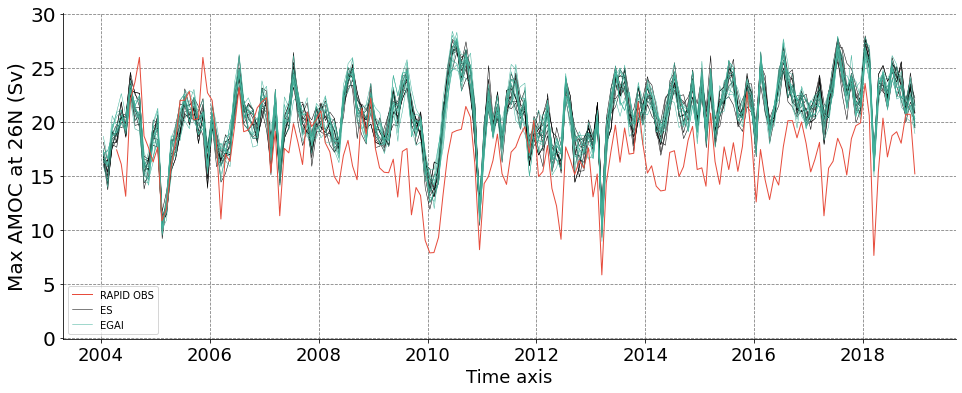

In [26]:
y1p='2004'
y2p='2019'

namo="mocIMHO_26N_1m_"+y1p+"-"+y2p+".png"

# plot timeseries
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

mocobs1m.plot(color='#e74c3c',linewidth='1',label="RAPID OBS",zorder=10)

for ie in range(mocm_ref.e.size):
#    mocsigA.isel(e=ie).isel(nav_lat=iyRapidsig).plot(linewidth=0.5,color='grey')
    mocm_ref.isel(e=ie).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='k')    
mocm_ref.isel(e=1).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='k',label="ES") 

for ie in range(mocm.e.size):
#    mocsigA.isel(e=ie).isel(nav_lat=iyRapidsig).plot(linewidth=0.5,color='grey')
    mocm.isel(e=ie).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='#45b39d')
mocm.isel(e=1).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='#45b39d',label="EGAI")

plt.ylim(-0.1,30.1)

ax = plt.gca()    


ax.grid(which='both', color='grey', linestyle='--')
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')


plt.xticks(rotation=0, ha='center',va="top")

plt.ylabel("Max AMOC at 26N (Sv)")
plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig1,diro,namo,dpifig=300)


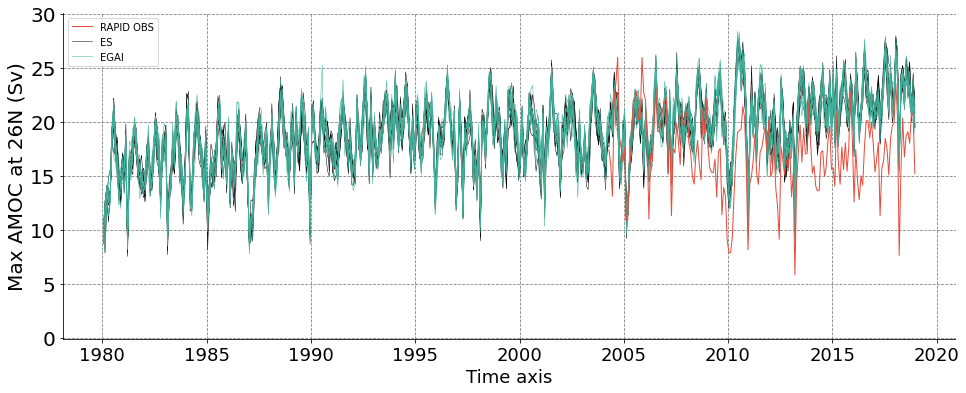

In [21]:
y1p='1980'
y2p='2019'

#diro="/gpfsscratch/rech/bcn/regi915/"
namo="mocIMHO_26N_1m_"+y1p+"-"+y2p+".png"

# plot timeseries
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

mocobs1m.plot(color='#e74c3c',linewidth='1',label="RAPID OBS",zorder=10)

for ie in range(mocm_ref.e.size):
#    mocsigA.isel(e=ie).isel(nav_lat=iyRapidsig).plot(linewidth=0.5,color='grey')
    mocm_ref.isel(e=ie).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='k')    
mocm_ref.isel(e=1).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='k',label="ES") 

for ie in range(mocm.e.size):
#    mocsigA.isel(e=ie).isel(nav_lat=iyRapidsig).plot(linewidth=0.5,color='grey')
    mocm.isel(e=ie).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='#45b39d')
mocm.isel(e=1).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='#45b39d',label="EGAI")

#mocm.isel(y=iyRapid).mean(dim='e').plot(linewidth=1,color='k',label=nexp)
    
#for ie in range(occimaxA.ensmb.size):
#    occimaxA.isel(ensmb=ie).isel(y=iyRapid2).plot(linewidth=0.5,color='grey')
#occimaxA.mean(dim='ensmb').isel(y=iyRapid2).plot(linewidth=2,color='k',linestyle='--',label='GSL emean (moc z)')

#mocm_refA.isel(y=iyRapid).plot(color='#2e86c1',linewidth='1',label="IMHO-S")

#mocmA.isel(y=iyRapid).plot(color='#154360',linewidth='3',label="IMHO-EGAI")


plt.ylim(-0.1,30.1)

ax = plt.gca()    


ax.grid(which='both', color='grey', linestyle='--')
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')


plt.xticks(rotation=0, ha='center',va="top")

plt.ylabel("Max AMOC at 26N (Sv)")
plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig1,diro,namo,dpifig=300)



* E stats on annual timeseries

In [10]:
Estd_mocmA=mocmA.std(dim='e')
Estd_mocm_refA=mocm_refA.std(dim='e')
EMEAN_mocmA=mocmA.mean(dim='e')
EMEAN_mocm_refA=mocm_refA.mean(dim='e')


* Annual mean plot (spagethhi)

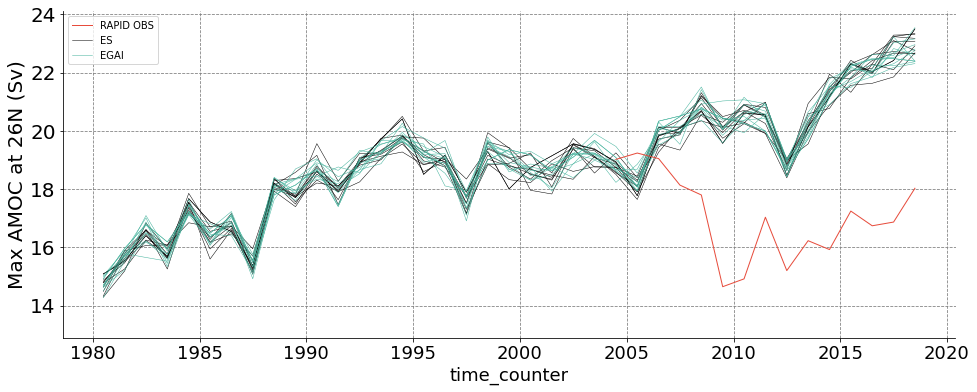

In [9]:
y1p='1980'
y2p='2019'

#diro="/gpfsscratch/rech/bcn/regi915/"
namo="mocIMHO_26N_1y_"+y1p+"-"+y2p+".png"

# plot timeseries
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

mocobs1y.plot(color='#e74c3c',linewidth='1',label="RAPID OBS",zorder=10)

for ie in range(mocm_refA.e.size):
#    mocsigA.isel(e=ie).isel(nav_lat=iyRapidsig).plot(linewidth=0.5,color='grey')
    mocm_refA.isel(e=ie).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='k')    
mocm_refA.isel(e=1).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='k',label="ES") 

for ie in range(mocmA.e.size):
#    mocsigA.isel(e=ie).isel(nav_lat=iyRapidsig).plot(linewidth=0.5,color='grey')
    mocmA.isel(e=ie).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='#45b39d')
mocmA.isel(e=1).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='#45b39d',label="EGAI")

#plt.fill_between(mocmA.time_counter,mocmA.isel(y=iyRapid)-2*sig.values,mocm_refA.isel(y=iyRapid)+2*sig.values,color="#aed6f1",alpha=0.8)


plt.ylim(12.9,24.1)

ax = plt.gca()    


ax.grid(which='both', color='grey', linestyle='--')
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')


plt.xticks(rotation=0, ha='center',va="top")

plt.ylabel("Max AMOC at 26N (Sv)")
plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig1,diro,namo,dpifig=300)



* Annual mean plot (emean and +/-2 std interval)

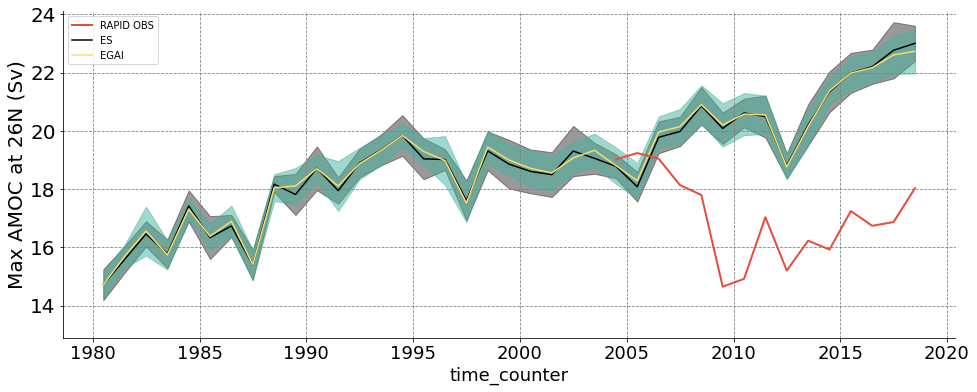

In [15]:
y1p='1980'
y2p='2019'

#diro="/gpfsscratch/rech/bcn/regi915/"
namo="mocIMHO_26N_1y_"+y1p+"-"+y2p+".png"

# plot timeseries
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

mocobs1y.plot(color='#e74c3c',linewidth='2',label="RAPID OBS",zorder=10)

#for ie in range(mocm_refA.e.size):
#    mocsigA.isel(e=ie).isel(nav_lat=iyRapidsig).plot(linewidth=0.5,color='grey')
#    mocm_refA.isel(e=ie).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='k')    
#mocm_refA.isel(e=1).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='k',label="ES") 
EMEAN_mocm_refA.isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=1.5,color='k',label="ES")
plt.fill_between(EMEAN_mocm_refA.time_counter,EMEAN_mocm_refA.isel(y=iyRapid)-2*Estd_mocm_refA.isel(y=iyRapid),EMEAN_mocm_refA.isel(y=iyRapid)+2*Estd_mocm_refA.isel(y=iyRapid),color="k",alpha=0.4)


#for ie in range(mocmA.e.size):
#    mocsigA.isel(e=ie).isel(nav_lat=iyRapidsig).plot(linewidth=0.5,color='grey')
#    mocmA.isel(e=ie).isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=0.5,color='#45b39d')
EMEAN_mocmA.isel(y=iyRapid).sel(time_counter=slice(y1p,y2p)).plot(linewidth=1.5,color='#f7dc6f',label="EGAI")
plt.fill_between(EMEAN_mocmA.time_counter,EMEAN_mocmA.isel(y=iyRapid)-2*Estd_mocmA.isel(y=iyRapid),EMEAN_mocmA.isel(y=iyRapid)+2*Estd_mocmA.isel(y=iyRapid),color="#45b39d",alpha=0.5)


plt.ylim(12.9,24.1)

ax = plt.gca()    


ax.grid(which='both', color='grey', linestyle='--')
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')


plt.xticks(rotation=0, ha='center',va="top")

plt.ylabel("Max AMOC at 26N (Sv)")
plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig1,diro,namo,dpifig=300)



In [16]:
test = mocm_refA.resample(time_counter="1Y",loffset="-1Y").mean()
test.time_counter.values

array(['1979-12-31T00:00:00.000000000', '1980-12-31T00:00:00.000000000',
       '1981-12-31T00:00:00.000000000', '1982-12-31T00:00:00.000000000',
       '1983-12-31T00:00:00.000000000', '1984-12-31T00:00:00.000000000',
       '1985-12-31T00:00:00.000000000', '1986-12-31T00:00:00.000000000',
       '1987-12-31T00:00:00.000000000', '1988-12-31T00:00:00.000000000',
       '1989-12-31T00:00:00.000000000', '1990-12-31T00:00:00.000000000',
       '1991-12-31T00:00:00.000000000', '1992-12-31T00:00:00.000000000',
       '1993-12-31T00:00:00.000000000', '1994-12-31T00:00:00.000000000',
       '1995-12-31T00:00:00.000000000', '1996-12-31T00:00:00.000000000',
       '1997-12-31T00:00:00.000000000', '1998-12-31T00:00:00.000000000',
       '1999-12-31T00:00:00.000000000', '2000-12-31T00:00:00.000000000',
       '2001-12-31T00:00:00.000000000', '2002-12-31T00:00:00.000000000',
       '2003-12-31T00:00:00.000000000', '2004-12-31T00:00:00.000000000',
       '2005-12-31T00:00:00.000000000', '2006-12-31

In [ ]:
iysam=535
nav_lat[iysam].values

In [ ]:
iyno=1050
nav_lat[0,iyno].values

<ipython-input-258-2310816bbf59>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs=ax.pcolormesh(X,Y,Z,cmap=cmap,norm=norm)


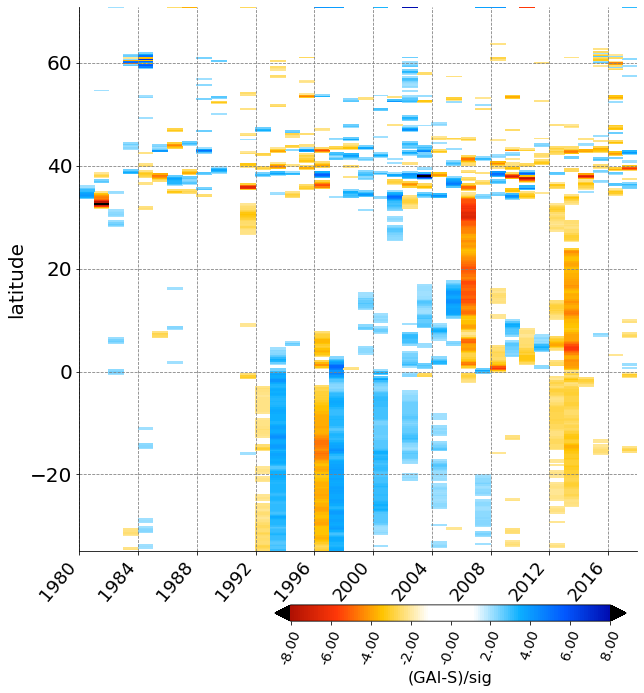

In [258]:
facsig=2

X = test.time_counter
Y = nav_lat.isel(y=slice(iysam,iyno))

Z=diff.transpose() #isel(y=slice(iysam,iyno)).transpose()
Zprime = Z

Z =Z.where(((Z>facsig*sig2d)|(Z<-facsig*sig2d)))
Z=Z/sig2d

fig2 = plt.figure(figsize=([10,10]),facecolor='white')
ax =  plt.gca()  
#plt.pcolormesh(X,Y,diff.transpose())
cs=ax.pcolormesh(X,Y,Z,cmap=cmap,norm=norm)


ax.grid(which='both', color='grey', linestyle='--')
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')


plt.xticks(rotation=50, ha='right',va="top")

plt.ylabel("latitude")
#plt.legend()

tlabel= "(GAI-S)/sig"
#cb = plt.colorbar(cs,cax=ax,extend='both', orientation='horizontal')
#fig2.colorbar(cs,extend='both', orientation='vertical') 
cb = addcolorbar2(fig2,cs,ax,levbounds,levincr=20,tformat="%.2f",
                                 tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',bbta=(0.08, -0.3,0.9,0.2))

plt.show()
slx.saveplt(fig2,diro,"AMOC_alllats_"+str(facsig)+"signorm_v2.png",dpifig=300)
plt.close(fig2)

In [218]:
def addcolorbar2(fig,cs,ax,levbounds,levincr=1,tformat="%.2f",tlabel='',shrink=0.45,facmul=1.,orientation='vertical',tc='k',loc='lower right',wth="15%",bbta=(0.08, -0.1,0.9,0.2)):
    lmin = levbounds[0]
    lmax = levbounds[1]
    incr = levbounds[2]
    levels = np.arange(lmin,lmax,incr)
    cblev = levels[::levincr]
    
    if orientation =='horizontal':
        axins1 = inset_axes(ax,
                        height=wth,  # height : 5%
                            width="70%",
                        bbox_to_anchor=bbta,
                        bbox_transform=ax.transAxes,
                        borderpad=0)

    if orientation =='vertical':
        axins1 = inset_axes(ax,
                        height="50%",  # height : 5%
                            width="2%",
                        loc='center left',
                       borderpad=2)

    cb = fig.colorbar(cs,cax=axins1,
                                    extend='both',                   
                                    ticks=cblev,
                                    spacing='uniform',
                                    orientation=orientation,
                                    )
    
    new_tickslabels = [tformat % i for i in cblev*facmul]
    cb.set_ticklabels(new_tickslabels)
    cb.ax.set_xticklabels(new_tickslabels, rotation=70,size=10,color=tc)
    cb.ax.tick_params(labelsize=14,color=tc) 
    cb.set_label(tlabel,size=16,color=tc)